In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import hashlib
import random

from tqdm.notebook import tqdm
import rdkit.Chem as Chem

from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import glob
import torch
torch.set_num_threads(1)
torch.multiprocessing.set_sharing_strategy('file_system')

%matplotlib inline

In [24]:
import sys
sys.path.append("/fs/pool/pool-marsot/tankbind_philip/TankBind/tankbind")

In [25]:
# Added by Enzo: path for test dataset
test_dataset = f"/fs/pool/pool-marsot/tankbind_philip/TankBind/dataset/test_dataset"

In [26]:
import sys
tankbind_src_folder = "/fs/pool/pool-marsot/tankbind_philip/TankBind/tankbind"
sys.path.insert(0, tankbind_src_folder)

import logging

from data import TankBindDataSet
from torch_geometric.loader import DataLoader
from model import get_model

In [27]:
result_folder = "/fs/pool/pool-marsot/tankbind_philip/TankBind/tankbind/predictions/"
os.system(f"mkdir -p {result_folder}")

rdkit_folder = f"{result_folder}/rdkit/"
os.system(f"mkdir -p {rdkit_folder}")

0

In [28]:
from feature_utils import read_mol, generate_sdf_from_smiles_using_rdkit, extract_torchdrug_feature_from_mol

"""compound_dict = {}
pre_renamed = "/fs/pool/pool-marsot/tankbind_enzo/bind/dataset/renumbered_path"
test = np.loadtxt("/fs/pool/pool-marsot/tankbind_enzo/bind/packages/EquiBind/data/timesplit_test", dtype=str)
for name in tqdm(test):
    #mol, _ = read_mol(f"{pre_renamed}/{name}.sdf", None)
    mol, _ = read_mol(f"{pre_renamed}/{name}_ligand.sdf", None)
    smiles = Chem.MolToSmiles(mol)

    rdkit_mol_path = f"{rdkit_folder}/{name}_ligand.sdf"
    generate_sdf_from_smiles_using_rdkit(smiles, rdkit_mol_path, shift_dis=0)

    mol, _ = read_mol(rdkit_mol_path, None)
    compound_dict[name] = extract_torchdrug_feature_from_mol(mol, has_LAS_mask=True)
torch.save(compound_dict, f"{result_folder}/pdbbind_test_compound_dict_based_on_rdkit.pt")"""

'compound_dict = {}\npre_renamed = "/fs/pool/pool-marsot/tankbind_enzo/bind/dataset/renumbered_path"\ntest = np.loadtxt("/fs/pool/pool-marsot/tankbind_enzo/bind/packages/EquiBind/data/timesplit_test", dtype=str)\nfor name in tqdm(test):\n    #mol, _ = read_mol(f"{pre_renamed}/{name}.sdf", None)\n    mol, _ = read_mol(f"{pre_renamed}/{name}_ligand.sdf", None)\n    smiles = Chem.MolToSmiles(mol)\n\n    rdkit_mol_path = f"{rdkit_folder}/{name}_ligand.sdf"\n    generate_sdf_from_smiles_using_rdkit(smiles, rdkit_mol_path, shift_dis=0)\n\n    mol, _ = read_mol(rdkit_mol_path, None)\n    compound_dict[name] = extract_torchdrug_feature_from_mol(mol, has_LAS_mask=True)\ntorch.save(compound_dict, f"{result_folder}/pdbbind_test_compound_dict_based_on_rdkit.pt")'

In [29]:
#added by Enzo
compound_dict = torch.load(f"{result_folder}/pdbbind_test_compound_dict_based_on_rdkit.pt")

In [30]:
#x = torch.load("/fs/pool/pool-marsot/tankbind_philip/TankBind/results/TankBind/1o2cmqql/checkpoints/epoch=19-step=597740.ckpt")
x = torch.load("/fs/pool/pool-marsot/tankbind_philip/TankBind/results/TankBind/fqqxcaf2/checkpoints/epoch=159-step=704160.ckpt")

In [31]:
x.keys()

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers'])

In [32]:
x["state_dict"].keys()

odict_keys(['model.bias', 'model.layernorm.weight', 'model.layernorm.bias', 'model.conv_protein.W_s.weight', 'model.conv_protein.W_v.0.scalar_norm.weight', 'model.conv_protein.W_v.0.scalar_norm.bias', 'model.conv_protein.W_v.1.dummy_param', 'model.conv_protein.W_v.1.wh.weight', 'model.conv_protein.W_v.1.ws.weight', 'model.conv_protein.W_v.1.ws.bias', 'model.conv_protein.W_v.1.wv.weight', 'model.conv_protein.W_e.0.scalar_norm.weight', 'model.conv_protein.W_e.0.scalar_norm.bias', 'model.conv_protein.W_e.1.dummy_param', 'model.conv_protein.W_e.1.wh.weight', 'model.conv_protein.W_e.1.ws.weight', 'model.conv_protein.W_e.1.ws.bias', 'model.conv_protein.W_e.1.wv.weight', 'model.conv_protein.layers.0.conv.message_func.0.dummy_param', 'model.conv_protein.layers.0.conv.message_func.0.wh.weight', 'model.conv_protein.layers.0.conv.message_func.0.ws.weight', 'model.conv_protein.layers.0.conv.message_func.0.ws.bias', 'model.conv_protein.layers.0.conv.message_func.0.wv.weight', 'model.conv_protein.la

In [33]:
new_dict = {}
for key, value in x["state_dict"].items():
    new_dict[key.replace("model.", "")] = value

In [34]:
new_dict.keys()

dict_keys(['bias', 'layernorm.weight', 'layernorm.bias', 'conv_protein.W_s.weight', 'conv_protein.W_v.0.scalar_norm.weight', 'conv_protein.W_v.0.scalar_norm.bias', 'conv_protein.W_v.1.dummy_param', 'conv_protein.W_v.1.wh.weight', 'conv_protein.W_v.1.ws.weight', 'conv_protein.W_v.1.ws.bias', 'conv_protein.W_v.1.wv.weight', 'conv_protein.W_e.0.scalar_norm.weight', 'conv_protein.W_e.0.scalar_norm.bias', 'conv_protein.W_e.1.dummy_param', 'conv_protein.W_e.1.wh.weight', 'conv_protein.W_e.1.ws.weight', 'conv_protein.W_e.1.ws.bias', 'conv_protein.W_e.1.wv.weight', 'conv_protein.layers.0.conv.message_func.0.dummy_param', 'conv_protein.layers.0.conv.message_func.0.wh.weight', 'conv_protein.layers.0.conv.message_func.0.ws.weight', 'conv_protein.layers.0.conv.message_func.0.ws.bias', 'conv_protein.layers.0.conv.message_func.0.wv.weight', 'conv_protein.layers.0.conv.message_func.1.dummy_param', 'conv_protein.layers.0.conv.message_func.1.wh.weight', 'conv_protein.layers.0.conv.message_func.1.ws.wei

In [35]:
from model import TankBindModel

In [36]:
model = TankBindModel()

In [37]:
model.load_state_dict(new_dict)

<All keys matched successfully>

In [38]:
from data import TankBindDataLoader
#dataset = TankBindDataSet("/fs/pool/pool-marsot/tankbind_philip/TankBind/tankbind/dataset/test_dataset", 
#                          proteinMode=0, compoundMode=1, pocket_radius=20, predDis=True)
#dataset = TankBindDataSet("/fs/pool/pool-marsot/tankbind_enzo/bind/dataset/test_dataset", proteinMode=0,
#                          compoundMode=1, pocket_radius=20, predDis=True)
dataset = TankBindDataSet(test_dataset, proteinMode=0,
                          compoundMode=1, pocket_radius=20, predDis=True)
#Enzo : removed the following line
#dataset.compound_dict = torch.load(f"{result_folder}/pdbbind_test_compound_dict_based_on_rdkit.pt")
# dataset.data = dataset.data.query("not use_compound_com").reset_index(drop=True)
data_loader = TankBindDataLoader(dataset, batch_size=1, 
                         follow_batch=['x', 'y', 'compound_pair'], shuffle=False, num_workers=8, pin_memory=True)


['/fs/pool/pool-marsot/tankbind_philip/TankBind/dataset/test_dataset/processed/data.pt', '/fs/pool/pool-marsot/tankbind_philip/TankBind/dataset/test_dataset/processed/protein.pt', '/fs/pool/pool-marsot/tankbind_philip/TankBind/dataset/test_dataset/processed/compound.pt']


In [39]:
# device = 'cpu'
device = "cuda:0"
logging.basicConfig(level=logging.INFO)
# model = get_model(0, logging, device)
model.eval()
model.to(device)
# model.load_state_dict(torch.load(f"/fs/pool/pool-marsot/tankbind_philip/TankBind/tankbind/result/2024_07_03_21_19/model_119.pt"))

affinity_pred_list = []
y_pred_list = []
for data in tqdm(data_loader):
    data = data.to(device)
    with torch.no_grad():
        y_pred, affinity_pred = model(data)
    affinity_pred_list.append(affinity_pred.detach().cpu())
    for i in range(data.y_batch.max() + 1):
        y_pred_list.append((y_pred[data['y_batch'] == i]).detach().cpu())

affinity_pred_list = torch.cat(affinity_pred_list)

  0%|          | 0/2879 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
output_info_chosen = dataset.data
output_info_chosen['affinity'] = affinity_pred_list
output_info_chosen['dataset_index'] = range(len(output_info_chosen))
output_info_chosen = output_info_chosen.query("not use_compound_com").reset_index(drop=True)

chosen = output_info_chosen.loc[output_info_chosen.groupby(['protein_name', 'compound_name'], 
                                                           sort=False)['affinity'].agg('idxmax')].reset_index()

In [40]:
chosen

,index,protein_name,compound_name,pdb,smiles,affinity,uid,pocket_com,use_compound_com,use_whole_protein,group,p_length,c_length,y_length,num_contact,native_num_contact,dataset_index
0,3,6h9v,6h9v,6h9v_2,,14.516186,B5BTR7,"[[18.2234, -7.3891, 59.1918]]",False,False,test,150,12,1800,0,78,4
1,14,6k2n,6k2n,6k2n_2,,11.205706,E2EA82,"[[-13.9865, 22.3949, -5.1347]]",False,False,test,122,40,4880,77,100,16
2,26,6g24,6g24,6g24_3,,9.204308,Q9BZ95,"[[-19.6153, -16.7561, 16.1047]]",False,False,test,75,16,1200,102,126,29
3,31,6quw,6quw,6quw_3,,14.104694,P01116,"[[8.6896, -23.8883, 22.6133]]",False,False,test,134,16,2144,102,123,35
4,34,6quv,6quv,6quv_0,,12.273392,P01116,"[[7.2021, -27.9503, 14.9458]]",False,False,test,122,26,3172,105,160,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2505,6oxr,6oxr,6oxr_c,,15.907000,Q8ULI9,"[[71.05784606933594, 59.704566955566406, 12.26...",False,False,test,150,40,6000,388,388,2864
359,2507,6oxw,6oxw,6oxw_c,,15.857277,Q8ULI9,"[[71.29326629638672, 59.908729553222656, 12.24...",False,False,test,150,42,6300,409,409,2867
360,2509,6oxv,6oxv,6oxv_c,,15.847820,Q8ULI9,"[[71.24668884277344, 59.80076217651367, 12.263...",False,False,test,150,42,6300,403,403,2870
361,2511,6oxp,6oxp,6oxp_c,,15.954771,Q8ULI9,"[[71.31407165527344, 59.1562614440918, 12.4932...",False,False,test,149,40,5960,391,391,2873


In [41]:
import contextlib
from typing import Any, Callable, Generator, Iterable

import joblib
from joblib import Parallel, delayed
from tqdm import tqdm
@contextlib.contextmanager
def tqdm_joblib(tqdm_object: tqdm) -> Generator[tqdm, None, None]:
    """Context manager to patch joblib to report into tqdm progress bar.
    The code for the context manager is adapted from a Stack Overflow answer:
    https://stackoverflow.com/a/58936697
    Args:
        tqdm_object (tqdm): The tqdm object that will display the progress.
    Yields:
        tqdm_object (tqdm): The same tqdm object, after joblib has been patched.
    Example:
        with tqdm_joblib(tqdm(total=10)) as progress_bar:
            # joblib code here
    """
    class TqdmBatchCompletionCallback(joblib.parallel.BatchCompletionCallBack):
        """Inner callback class for updating tqdm progress during joblib execution."""
        def __init__(self, *args: Any, **kwargs: Any) -> None:
            """Initialize the callback, forwarding arguments to the parent class."""
            super().__init__(*args, **kwargs)
        def __call__(self, *args: Any, **kwargs: Any) -> None:
            """Update tqdm progress upon batch completion."""
            tqdm_object.update(n=self.batch_size)
            return super().__call__(*args, **kwargs)
    old_batch_callback = joblib.parallel.BatchCompletionCallBack
    joblib.parallel.BatchCompletionCallBack = TqdmBatchCompletionCallback
    try:
        yield tqdm_object
    finally:
        joblib.parallel.BatchCompletionCallBack = old_batch_callback
        tqdm_object.close()
def distribute_function(
    func: Callable,
    X: Iterable,
    n_jobs: int,
    description: str = "",
    total: int = 1,
    use_enumerate: bool = False,
    **kwargs,
) -> Any:
    """Distributes function `func` over iterable `X` using `n_jobs` cores.
    Args:
        func (Callable): function to be distributed
        X (Iterable): iterable over which the function is distributed
        n_jobs (int): number of cores to use
        description (str, optional): Description of the progress. Defaults to "".
        total (int, optional): Total number of elements in `X`. Defaults to 1.
    Returns:
        Any: result of the `func` applied to `X`.
    """
    if total == 1:
        total = len(X)  # type: ignore
    with tqdm_joblib(tqdm(desc=description, total=total)):
        if use_enumerate:
            Xt = Parallel(n_jobs=n_jobs, prefer="threads")(
                delayed(func)(idx, x, **kwargs) for idx, x in enumerate(X)
            )
        else:
            Xt = Parallel(n_jobs=n_jobs, prefer="threads")(
                delayed(func)(x, **kwargs) for x in X
            )
    return Xt


In [21]:
from generation_utils import get_LAS_distance_constraint_mask, get_info_pred_distance, write_with_new_coords

device = "cpu"
#added by Enzo
def process_coords(index_line):
    index,line = index_line
    name = compound_name = line['compound_name']
    dataset_index = line['dataset_index']
    coords = dataset[dataset_index].coords.to(device)
    protein_nodes_xyz = dataset[dataset_index].node_xyz.to(device)
    n_compound = coords.shape[0]
    n_protein = protein_nodes_xyz.shape[0]
    y_pred = y_pred_list[dataset_index].reshape(n_protein, n_compound).to(device)
    y = dataset[dataset_index].dis_map.reshape(n_protein, n_compound).to(device)
    compound_pair_dis_constraint = torch.cdist(coords, coords)
    rdkit_mol_path = f"{rdkit_folder}/{name}_ligand.sdf"
    # mol = Chem.MolFromMolFile(rdkit_mol_path)
    mol, _ = read_mol(rdkit_mol_path, None)
    LAS_distance_constraint_mask = get_LAS_distance_constraint_mask(mol).bool()
    pred_dist_info = get_info_pred_distance(coords, y_pred, protein_nodes_xyz, compound_pair_dis_constraint,
                                  LAS_distance_constraint_mask=LAS_distance_constraint_mask,
                                  n_repeat=1, show_progress=False)

    toFile = f'{result_folder}/{name}_tankbind_chosen.sdf'
    new_coords = pred_dist_info.sort_values("loss")['coords'].iloc[0].astype(np.double)
    write_with_new_coords(mol, new_coords, toFile)

distribute_function(process_coords, chosen.iterrows(), n_jobs=8, description="Generating new coordinates", total=chosen.shape[0])

# for idx, line in tqdm(chosen.iterrows(), total=chosen.shape[0]):
#     name = compound_name = line['compound_name']
#     dataset_index = line['dataset_index']
#     coords = dataset[dataset_index].coords.to(device)
#     protein_nodes_xyz = dataset[dataset_index].node_xyz.to(device)
#     n_compound = coords.shape[0]
#     n_protein = protein_nodes_xyz.shape[0]
#     y_pred = y_pred_list[dataset_index].reshape(n_protein, n_compound).to(device)
#     y = dataset[dataset_index].dis_map.reshape(n_protein, n_compound).to(device)
#     compound_pair_dis_constraint = torch.cdist(coords, coords)
#     rdkit_mol_path = f"{rdkit_folder}/{name}_ligand.sdf"
#     # mol = Chem.MolFromMolFile(rdkit_mol_path)
#     mol, _ = read_mol(rdkit_mol_path, None)
#     LAS_distance_constraint_mask = get_LAS_distance_constraint_mask(mol).bool()
#     pred_dist_info = get_info_pred_distance(coords, y_pred, protein_nodes_xyz, compound_pair_dis_constraint,
#                                   LAS_distance_constraint_mask=LAS_distance_constraint_mask,
#                                   n_repeat=1, show_progress=False)

#     toFile = f'{result_folder}/{name}_tankbind_chosen.sdf'
#     new_coords = pred_dist_info.sort_values("loss")['coords'].iloc[0].astype(np.double)
#     write_with_new_coords(mol, new_coords, toFile)



Generating new coordinates:   0%|                                                                                                                                                | 0/363 [00:00<?, ?it/s]

Generating new coordinates:  51%|███████████████████████████████████████████████████████████████████▉                                                                  | 184/363 [31:43<12:09,  4.08s/it]

In [43]:
# taken from https://github.com/nghiaho12/rigid_transform_3D/blob/master/rigid_transform_3D.py
# "Least-Squares Fitting of Two 3-D Point Sets", Arun, K. S. and Huang, T. S. and Blostein, S. D, IEEE Transactions on Pattern Analysis and Machine Intelligence, Volume 9 Issue 5, May 1987
# Input: expects 3xN matrix of points
# Returns R,t
# R = 3x3 rotation matrix
# t = 3x1 column vector

def rigid_transform_3D(A, B, correct_reflection=True):
    assert A.shape == B.shape

    num_rows, num_cols = A.shape
    if num_rows != 3:
        raise Exception(f"matrix A is not 3xN, it is {num_rows}x{num_cols}")

    num_rows, num_cols = B.shape
    if num_rows != 3:
        raise Exception(f"matrix B is not 3xN, it is {num_rows}x{num_cols}")

    # find mean column wise
    centroid_A = np.mean(A, axis=1)
    centroid_B = np.mean(B, axis=1)

    # ensure centroids are 3x1
    centroid_A = centroid_A.reshape(-1, 1)
    centroid_B = centroid_B.reshape(-1, 1)

    # subtract mean
    Am = A - centroid_A
    Bm = B - centroid_B

    H = Am @ np.transpose(Bm)

    # sanity check
    #if linalg.matrix_rank(H) < 3:
    #    raise ValueError("rank of H = {}, expecting 3".format(linalg.matrix_rank(H)))

    # find rotation
    U, S, Vt = np.linalg.svd(H)
    R = Vt.T @ U.T

    # special reflection case
    if np.linalg.det(R) < 0 and correct_reflection:
        print("det(R) < R, reflection detected!, correcting for it ...")
        Vt[2,:] *= -1
        R = Vt.T @ U.T

    t = -R @ centroid_A + centroid_B

    return R, t

def compute_RMSD(a, b):
    # correct rmsd calculation.
    return np.sqrt((((a-b)**2).sum(axis=-1)).mean())

def kabsch_RMSD(new_coords, coords):
    out = new_coords.T
    target = coords.T
    ret_R, ret_t = rigid_transform_3D(out, target, correct_reflection=False)
    out = (ret_R@out) + ret_t
    return compute_RMSD(target.T, out.T)

In [44]:
info = []
pre = "/gxr/luwei/pdbbind/pdbbind2020"
test = np.loadtxt("/fs/pool/pool-marsot/tankbind_philip/TankBind/packages/EquiBind/data/timesplit_test", dtype=str)
for pdb in test:
    mol, _ = read_mol(f"/fs/pool/pool-marsot/tankbind_philip/TankBind/data/renumber_atom_index_same_as_smiles/{pdb}.sdf", None)
    mol_pred, _ = read_mol(f"{result_folder}/{pdb}_tankbind_chosen.sdf", None)
    # mol = Chem.MolFromMolFile(f"{pre}/renumber_atom_index_same_as_smiles/{pdb}.sdf")
    # mol_pred = Chem.MolFromMolFile(f"{result_folder}/{pdb}_tankbind_chosen.sdf")

    sm = Chem.MolToSmiles(mol)
    m_order = list(mol.GetPropsAsDict(includePrivate=True, includeComputed=True)['_smilesAtomOutputOrder'])
    mol = Chem.RenumberAtoms(mol, m_order)
    mol = Chem.RemoveHs(mol)
    true_ligand_pos = np.array(mol.GetConformer().GetPositions())

    sm = Chem.MolToSmiles(mol_pred)
    m_order = list(mol_pred.GetPropsAsDict(includePrivate=True, includeComputed=True)['_smilesAtomOutputOrder'])
    mol_pred = Chem.RenumberAtoms(mol_pred, m_order)
    mol_pred = Chem.RemoveHs(mol_pred)
    mol_pred_pos = np.array(mol_pred.GetConformer().GetPositions())

    rmsd = np.sqrt(((true_ligand_pos - mol_pred_pos) ** 2).sum(axis=1).mean(axis=0))
    kabsch = kabsch_RMSD(mol_pred_pos, true_ligand_pos)
    com_dist = compute_RMSD(mol_pred_pos.mean(axis=0), true_ligand_pos.mean(axis=0))
    info.append([pdb, rmsd, com_dist, kabsch])


In [45]:
# custom description function.
def below_threshold(x, threshold=5):
    return 100 * (x < threshold).sum() / len(x)
def custom_description(data):
    t1 = data
    t2 = t1.describe()
    t3 = t1.iloc[:,1:].apply(below_threshold, threshold=2, axis=0).reset_index(name='2A').set_index('index').T
    t31 = t1.iloc[:,1:].apply(below_threshold, threshold=5, axis=0).reset_index(name='5A').set_index('index').T
    t32 = t1.iloc[:,1:].median().reset_index(name='median').set_index('index').T
    t4 = pd.concat([t2, t3, t31, t32]).loc[['mean', '25%', '50%', '75%', '5A', '2A', 'median']]
    t5 = t4.T.reset_index()
    t5[['Methods', 'Metrics']] = t5['index'].str.split('_', n=1, expand=True)
    t6 = pd.pivot(t5, values=['mean', 'median', '25%', '50%', '75%', '5A', '2A'], index=['Methods'], columns=['Metrics'])
    t6_col = t6.columns
    t6.columns = t6_col.swaplevel(0, 1)
    t7 = t6[sorted(t6.columns)]
    my_MultiIndex = [
                (    'RMSD',  'mean'),
                (    'RMSD',   '25%'),
                (    'RMSD',  '50%'),
                (    'RMSD',   '75%'),
                (    'RMSD',  '5A'),
                (    'RMSD', '2A'),
                ('COM_DIST',  'mean'),
                ('COM_DIST',   '25%'),
                ('COM_DIST',  '50%'),
                ('COM_DIST',   '75%'),
                ('COM_DIST',  '5A'),
                ('COM_DIST', '2A'),
                (  'KABSCH',  'mean'),
                (  'KABSCH',   'median'),
                ]
    t8 = t7[my_MultiIndex]

    my_MultiIndex_fancy = [
                (    'Ligand RMSD $\downarrow$', ' ', 'mean'),
                (    'Ligand RMSD $\downarrow$', 'Percentiles $\downarrow$', '25%'),
                (    'Ligand RMSD $\downarrow$', 'Percentiles $\downarrow$',  '50%'),
                (    'Ligand RMSD $\downarrow$', 'Percentiles $\downarrow$',   '75%'),
                (    'Ligand RMSD $\downarrow$', r'% Below Threshold $\uparrow$',  '5A'),
                (    'Ligand RMSD $\downarrow$', r'% Below Threshold $\uparrow$', '2A'),
                ('Centroid Distance $\downarrow$', ' ',  'mean'),
                ('Centroid Distance $\downarrow$', 'Percentiles $\downarrow$',   '25%'),
                ('Centroid Distance $\downarrow$', 'Percentiles $\downarrow$',  '50%'),
                ('Centroid Distance $\downarrow$', 'Percentiles $\downarrow$',   '75%'),
                ('Centroid Distance $\downarrow$', r'% Below Threshold $\uparrow$', '5A'),
                ('Centroid Distance $\downarrow$', r'% Below Threshold $\uparrow$', '2A'),
                (  'KABSCH', 'RMSD $\downarrow$',  'mean'),
                (  'KABSCH', 'RMSD $\downarrow$',   'median'),
                ]

    t8.columns = pd.MultiIndex.from_tuples(my_MultiIndex_fancy)
    return t8.round(2)


In [22]:
d

NameError: name 'd' is not defined

In [28]:
d = pd.DataFrame(info, columns=['pdb', 'TankBind_RMSD', 'TankBind_COM_DIST', 'TankBind_KABSCH'])
custom_description(d)

Ligand RMSD $\downarrow$                                      \
                                  Percentiles $\downarrow$              
                             mean                      25%   50%  75%   
Methods                                                                 
TankBind                     8.26                     2.38  4.46  8.7   

                                             Centroid Distance $\downarrow$  \
         % Below Threshold $\uparrow$                                         
                                   5A     2A                           mean   
Methods                                                                       
TankBind                         55.1  19.83                           6.18   

                                                                            \
         Percentiles $\downarrow$             % Below Threshold $\uparrow$   
                              25%   50%   75%                           5A   
Methods                                                                      
TankBind                     0.83  1.75  4.53                        76.58   

                           KABSCH         
                RMSD $\downarrow$         
             2A              mean median  
Methods                                   
TankBind  55.37              2.55   1.96

In [33]:
list_y_truth = []

In [34]:
for idx, line in tqdm(chosen.iterrows(), total=chosen.shape[0]):
    dataset_index = line['dataset_index']
    y = dataset[dataset_index].dis_map
    list_y_truth.append(y)

  0%|                                                                                                                                              | 0/363 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 363/363 [00:01<00:00, 207.53it/s]


In [35]:
cat_truth = torch.cat(list_y_truth)

In [36]:
cat_truth_np = cat_truth.cpu().numpy()

In [37]:
cat_pred = torch.cat(y_pred_list, dim=0)

In [38]:
cat_np = cat_pred.detach().cpu().numpy()

In [39]:
%matplotlib inline

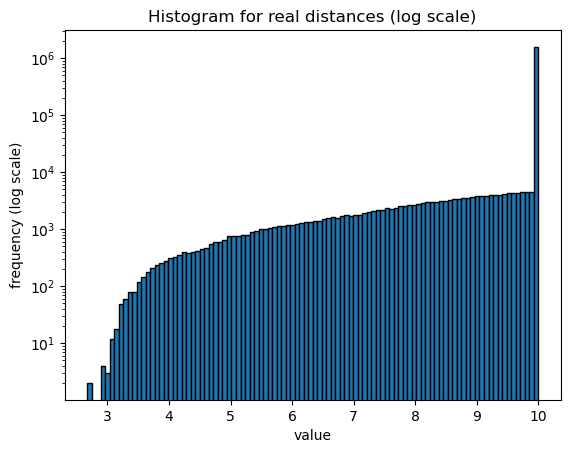

In [40]:
plt.hist(cat_truth_np, bins=100, edgecolor='black')
plt.yscale('log')
plt.title("Histogram for real distances (log scale)")
plt.xlabel("value")
plt.ylabel("frequency (log scale)")
plt.show()


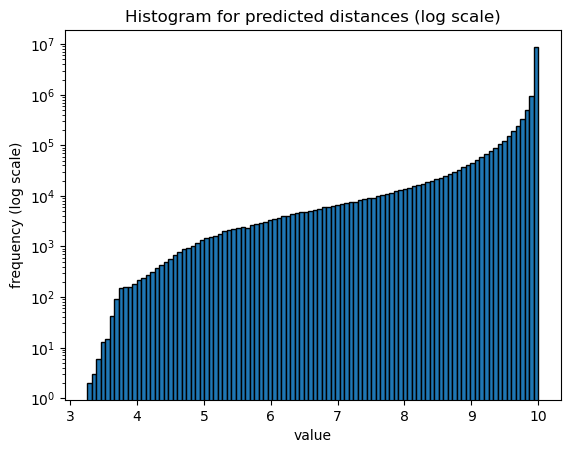

In [41]:
plt.hist(cat_np, bins=100, edgecolor='black')
plt.yscale('log')
plt.title("Histogram for predicted distances (log scale)")
plt.xlabel("value")
plt.ylabel("frequency (log scale)")
plt.show()
